In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Julian/Downloads/Simulation-Dichtprüfung/Simulation-Dichtprüfung/simulation-st5.csv", sep=';')

C:\Users\Julian\AppData\Local\Temp\ipykernel_4512\2094602378.py:4: DtypeWarning: Columns (1,7,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Julian/Downloads/Simulation-Dichtprüfung/Simulation-Dichtprüfung/simulation-st5.csv", sep=';')


In [2]:
df.head(400)

,time,configuration_label,configuration_label_druck_change_5,configuration_label_druck_change_6,configuration_label_druck_change_7,druck,handaktiv,identnummer,iomaster,leck,maintenance_label,maintenance_label_cleaning,messenaktiv,repair_label,rework_label,rework_label_assembly_error,status
0,1635112800000,NaN,False,False,False,5.362381,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0
1,1635112801000,NaN,False,False,False,4.604942,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0
2,1635112802000,NaN,False,False,False,6.139246,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0
3,1635112803000,NaN,False,False,False,5.217539,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0
4,1635112804000,NaN,False,False,False,4.224132,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1635113195000,NaN,False,False,False,4.807193,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0
396,1635113196000,NaN,False,False,False,4.024727,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0
397,1635113197000,NaN,False,False,False,4.874916,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0
398,1635113198000,NaN,False,False,False,4.913887,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455424 entries, 0 to 1455423
Data columns (total 17 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   time                                1455424 non-null  int64  
 1   configuration_label                 391 non-null      object 
 2   configuration_label_druck_change_5  1455424 non-null  bool   
 3   configuration_label_druck_change_6  1455424 non-null  bool   
 4   configuration_label_druck_change_7  1455424 non-null  bool   
 5   druck                               1455424 non-null  float64
 6   handaktiv                           1455424 non-null  bool   
 7   identnummer                         835107 non-null   object 
 8   iomaster                            1455424 non-null  bool   
 9   leck                                1455424 non-null  float64
 10  maintenance_label                   626 non-null      object 
 11  maintenance

In [4]:
df.isnull().sum()

time                                        0
configuration_label                   1455033
configuration_label_druck_change_5          0
configuration_label_druck_change_6          0
configuration_label_druck_change_7          0
druck                                       0
handaktiv                                   0
identnummer                            620317
iomaster                                    0
leck                                        0
maintenance_label                     1454798
maintenance_label_cleaning                  0
messenaktiv                                 0
repair_label                          1455424
rework_label                          1450646
rework_label_assembly_error                 0
status                                      0
dtype: int64

In [25]:
#falls Datum interessant ist
ts = df.iat[0,0]
from datetime import datetime
s = datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d %H:%M:%S')
s

'2021-10-24 22:00:00'

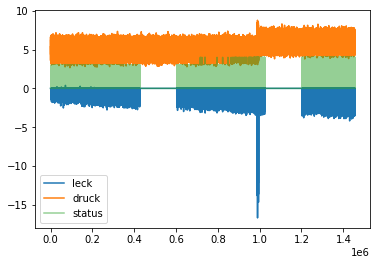

In [9]:
#Gesamtübersicht über Leck, Druck, Status
df['leck'].plot()
df['druck'].plot()
df['status'].plot(alpha=0.5)
plt.legend()

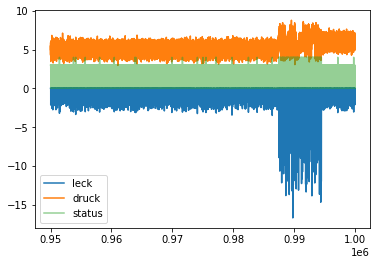

In [13]:
#Zoom in
d = df[950000:1000000]
d['leck'].plot()
d['druck'].plot()
d['status'].plot(alpha=0.5)
plt.legend()

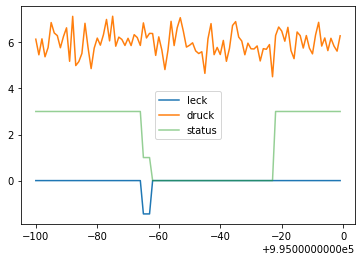

In [12]:
#Zoom in
d = df[994900:995000]
d['leck'].plot()
d['druck'].plot()
d['status'].plot(alpha=0.5)
plt.legend()

In [18]:
df['druck'].describe()

count    1.455424e+06
mean     5.321954e+00
std      6.866639e-01
min      2.661133e+00
25%      4.824836e+00
50%      5.266114e+00
75%      5.794088e+00
max      8.783989e+00
Name: druck, dtype: float64

In [20]:
c = df['druck'] > 7
c.value_counts()

False    1443673
True       11751
Name: druck, dtype: int64